IMPORTING THE PYTHON  LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error


importing the laptop dataset through pandas

In [2]:
dff=pd.read_csv("c:/Users/Asus/Downloads/laptop_prices_large.csv")
print(dff.head())

   RAM_GB  Storage_GB  Processor_Speed_GHz  Weight_kg  Battery_Hours   Price
0      16        1024                 1.87        2.8              7   65535
1      32         512                 3.14        1.7              6  114478
2       4         512                 2.46        1.8              8   47811
3      16        2048                 2.87        3.3              9   74804
4      16         512                 3.71        2.7              5   79303


some data preprocessing in the laptop dataset

In [3]:
print(dff.shape)
print(dff.describe())
print(dff.info())



(100, 6)
           RAM_GB  Storage_GB  Processor_Speed_GHz   Weight_kg  Battery_Hours  \
count  100.000000   100.00000           100.000000  100.000000     100.000000   
mean    16.320000   967.68000             2.845700    2.534000       6.160000   
std     11.107264   677.39052             0.615368    0.584172       1.973153   
min      4.000000   256.00000             1.810000    1.500000       3.000000   
25%      8.000000   256.00000             2.310000    2.075000       4.000000   
50%     16.000000  1024.00000             2.865000    2.600000       6.000000   
75%     32.000000  1024.00000             3.410000    3.000000       8.000000   
max     32.000000  2048.00000             3.870000    3.500000       9.000000   

               Price  
count     100.000000  
mean    73594.910000  
std     28264.070642  
min     29137.000000  
25%     49308.500000  
50%     64353.500000  
75%    105013.500000  
max    128126.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 

plot the heatmap for the dataset

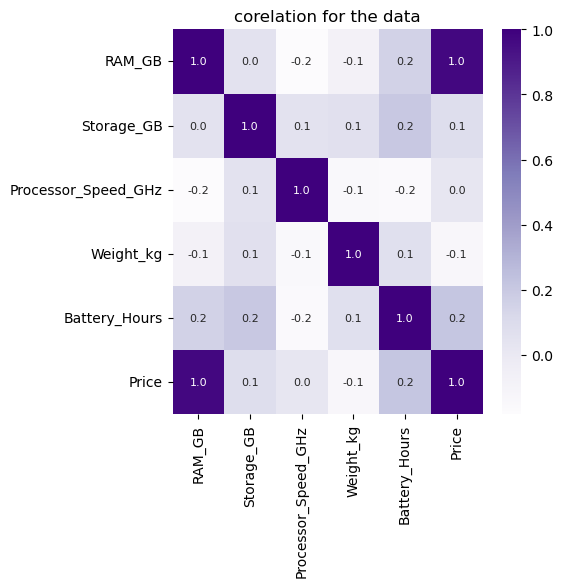

In [4]:
correlation=dff.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Purples')
plt.title("corelation for the data")
plt.show()

In [5]:
x=dff.drop(['Price'],axis=1)
y=dff['Price']

to train and test the dataset

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


then create a model after train and test a dataset

In [7]:
model=LinearRegression()


model fit and pridict

In [8]:
model.fit(x_train,y_train)
yo=model.predict(x_test)
print(yo)

[122032.17649559 116439.10395694  59529.09170462 105059.77475374
 111531.66938924  84968.08176452  51664.04089644  69803.68925232
  65091.2998241   64111.38576062 124888.91606767  36704.96759648
  48508.32206045  53803.33779585 107610.7451809   79399.49703366
 120453.58429468 107205.8517436   79395.08264934  33919.09662661]


after pridiction check the error like r^2 error meanabsolute error this stage is evalution the model

In [9]:
r2error=r2_score(y_test,yo)
mae=mean_absolute_error(y_test,yo)
print(f"the r2 error of the model is :{r2error:.2f}")
print(f"the mean absolute error of the model is :{mae:.2f}")



the r2 error of the model is :0.99
the mean absolute error of the model is :1984.48


ploting the reletion btw actuel value and pridicted value

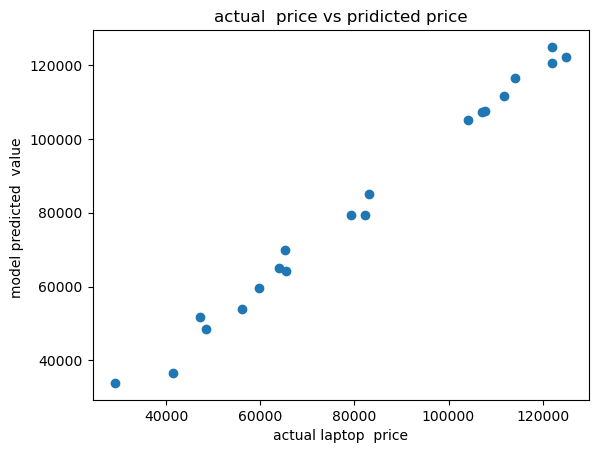

In [10]:
plt.scatter(y_test,yo)
plt.xlabel("actual laptop  price")
plt.ylabel("model predicted  value ")
plt.title("actual  price vs pridicted price")
plt.show()

its is good my model working well and we add new features values to pridict 

In [11]:
new_feature_value=[[ 16,256 ,0.90 ,1.5 ,5]]   
pridict_price=model.predict(new_feature_value)
print(f"the pridicted price for new features is :{pridict_price[0]:.2f}")

the pridicted price for new features is :53812.62


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


when i try to print the pridicted value i pass the .2f to print 2 digits after point it come error so i use .item() or also use [0]

save the model with pickle file 

In [12]:
import pickle
with open("model_pickle","wb") as ff:
    pickle.dump(model,ff)

In [13]:
with open("model_pickle","rb") as ff:
    yoo=pickle.load(ff)

test the file to pridict the new value

In [19]:
res=yoo.predict([[ 16,256 ,0.90 ,1.5 ,5]])
print(f"{res[0]:.2f}")
# print("{:.2f}".format(res))

53812.62


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
